In [ ]:
#The following codes are used for figure 1 and 2 (all cells and epidermal keratinocytes)

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanorama

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

In [ ]:
adata1=sc.read_10x_h5('Q:/Diabetic/diab7/filtered_feature_bc_matrix.h5') 
adata2=sc.read_10x_h5('Q:/Diabetic/diab9/filtered_feature_bc_matrix.h5') 
adata3=sc.read_10x_h5('Q:/Diabetic/diab10/filtered_feature_bc_matrix.h5')
adata4=sc.read_10x_h5('Q:/Diabetic/diab13/filtered_feature_bc_matrix.h5')
adata5=sc.read_10x_h5('Q:/Diabetic/diab16/filtered_feature_bc_matrix.h5')
adata6=sc.read_10x_h5('Q:/Diabetic/diab19/filtered_feature_bc_matrix.h5')
adata7=sc.read_10x_h5('Q:/Diabetic/diab19b/filtered_feature_bc_matrix.h5')
adata8=sc.read_10x_h5('Q:/Diabetic/diab19c/filtered_feature_bc_matrix.h5')

In [ ]:
adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()
adata4.var_names_make_unique()
adata5.var_names_make_unique()
adata6.var_names_make_unique()
adata7.var_names_make_unique()
adata8.var_names_make_unique()

In [6]:
adata1.obs['age']='53'
adata1.obs['sex']='Female'

In [7]:
adata2.obs['age']='63'
adata2.obs['sex']='Female'

In [8]:
adata3.obs['age']='54'
adata3.obs['sex']='Male'

In [9]:
adata4.obs['age']='59'
adata4.obs['sex']='Male'

In [10]:
adata5.obs['age']='67'
adata5.obs['sex']='Female'

In [11]:
adata6.obs['age']='49'
adata6.obs['sex']='Male'

In [12]:
adata7.obs['age']='49'
adata7.obs['sex']='Male'

In [13]:
adata8.obs['age']='49'
adata8.obs['sex']='Male'

In [14]:
adatab=adata1.concatenate(adata2,adata3,adata4,adata5,batch_key="sample",batch_categories=['07-d','09-d','10-d','13-d','16-d'])

In [15]:
adatac=adata6.concatenate(adata7,adata8, batch_key="sample",batch_categories=['19-n','19b-n','19c-n'])

In [16]:
adata=adatab.concatenate(adatac, batch_key="condition",batch_categories=['diabetic','non diabetic'])

In [17]:
adata.obs

age     sex sample     condition
AAACCTGAGACAATAC-1-07-d-diabetic       53  Female   07-d      diabetic
AAACCTGAGACTGGGT-1-07-d-diabetic       53  Female   07-d      diabetic
AAACCTGAGAGTCTGG-1-07-d-diabetic       53  Female   07-d      diabetic
AAACCTGAGATCACGG-1-07-d-diabetic       53  Female   07-d      diabetic
AAACCTGAGCGTGTCC-1-07-d-diabetic       53  Female   07-d      diabetic
...                                    ..     ...    ...           ...
TTTGTCACATGGGACA-1-19c-n-non diabetic  49    Male  19c-n  non diabetic
TTTGTCAGTATTCTCT-1-19c-n-non diabetic  49    Male  19c-n  non diabetic
TTTGTCAGTCTCTTTA-1-19c-n-non diabetic  49    Male  19c-n  non diabetic
TTTGTCAGTCTGATCA-1-19c-n-non diabetic  49    Male  19c-n  non diabetic
TTTGTCATCACTTACT-1-19c-n-non diabetic  49    Male  19c-n  non diabetic

[30852 rows x 4 columns]

normalizing counts per cell
    finished (0:00:00)


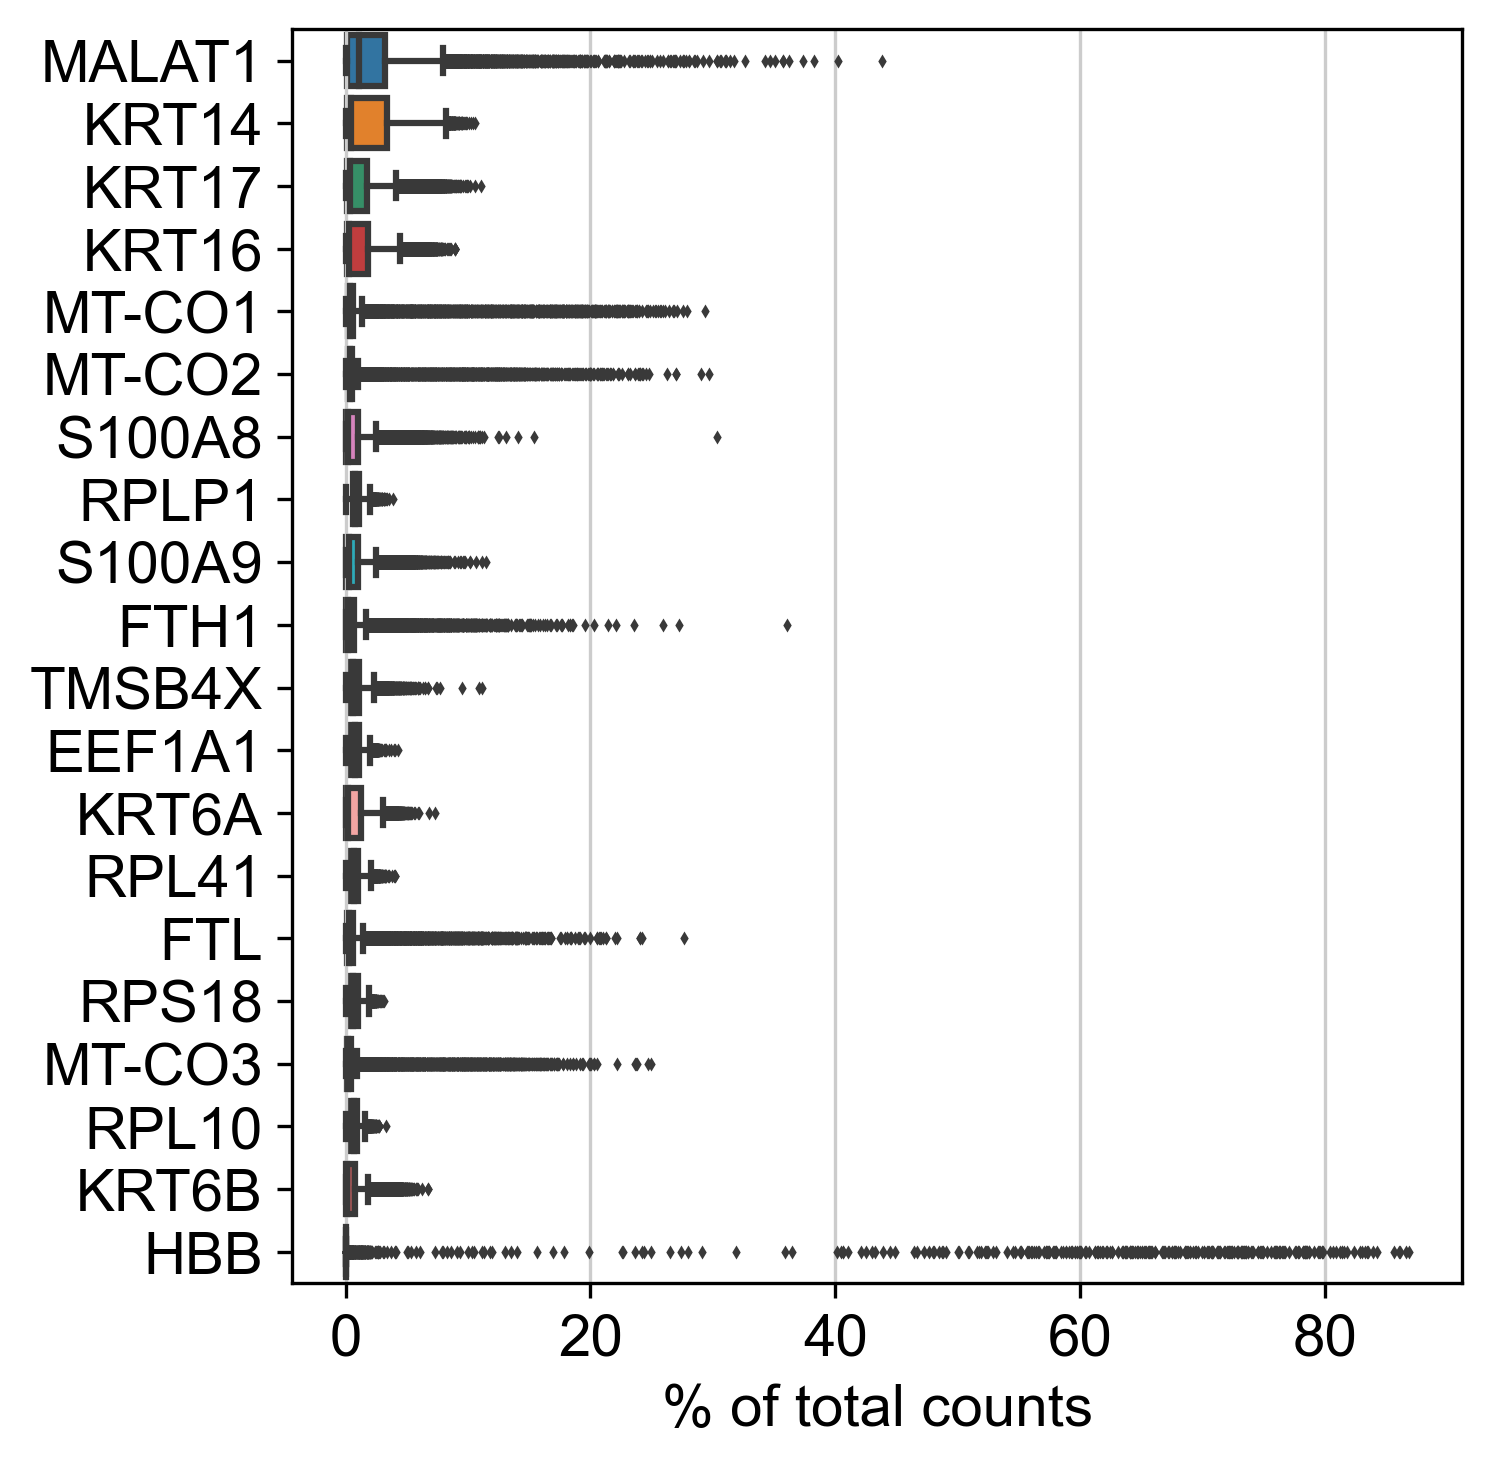

In [18]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [19]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 822 cells that have less than 200 genes expressed
filtered out 3877 genes that are detected in less than 3 cells


In [20]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'age' as categorical
... storing 'sex' as categorical
... storing 'sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


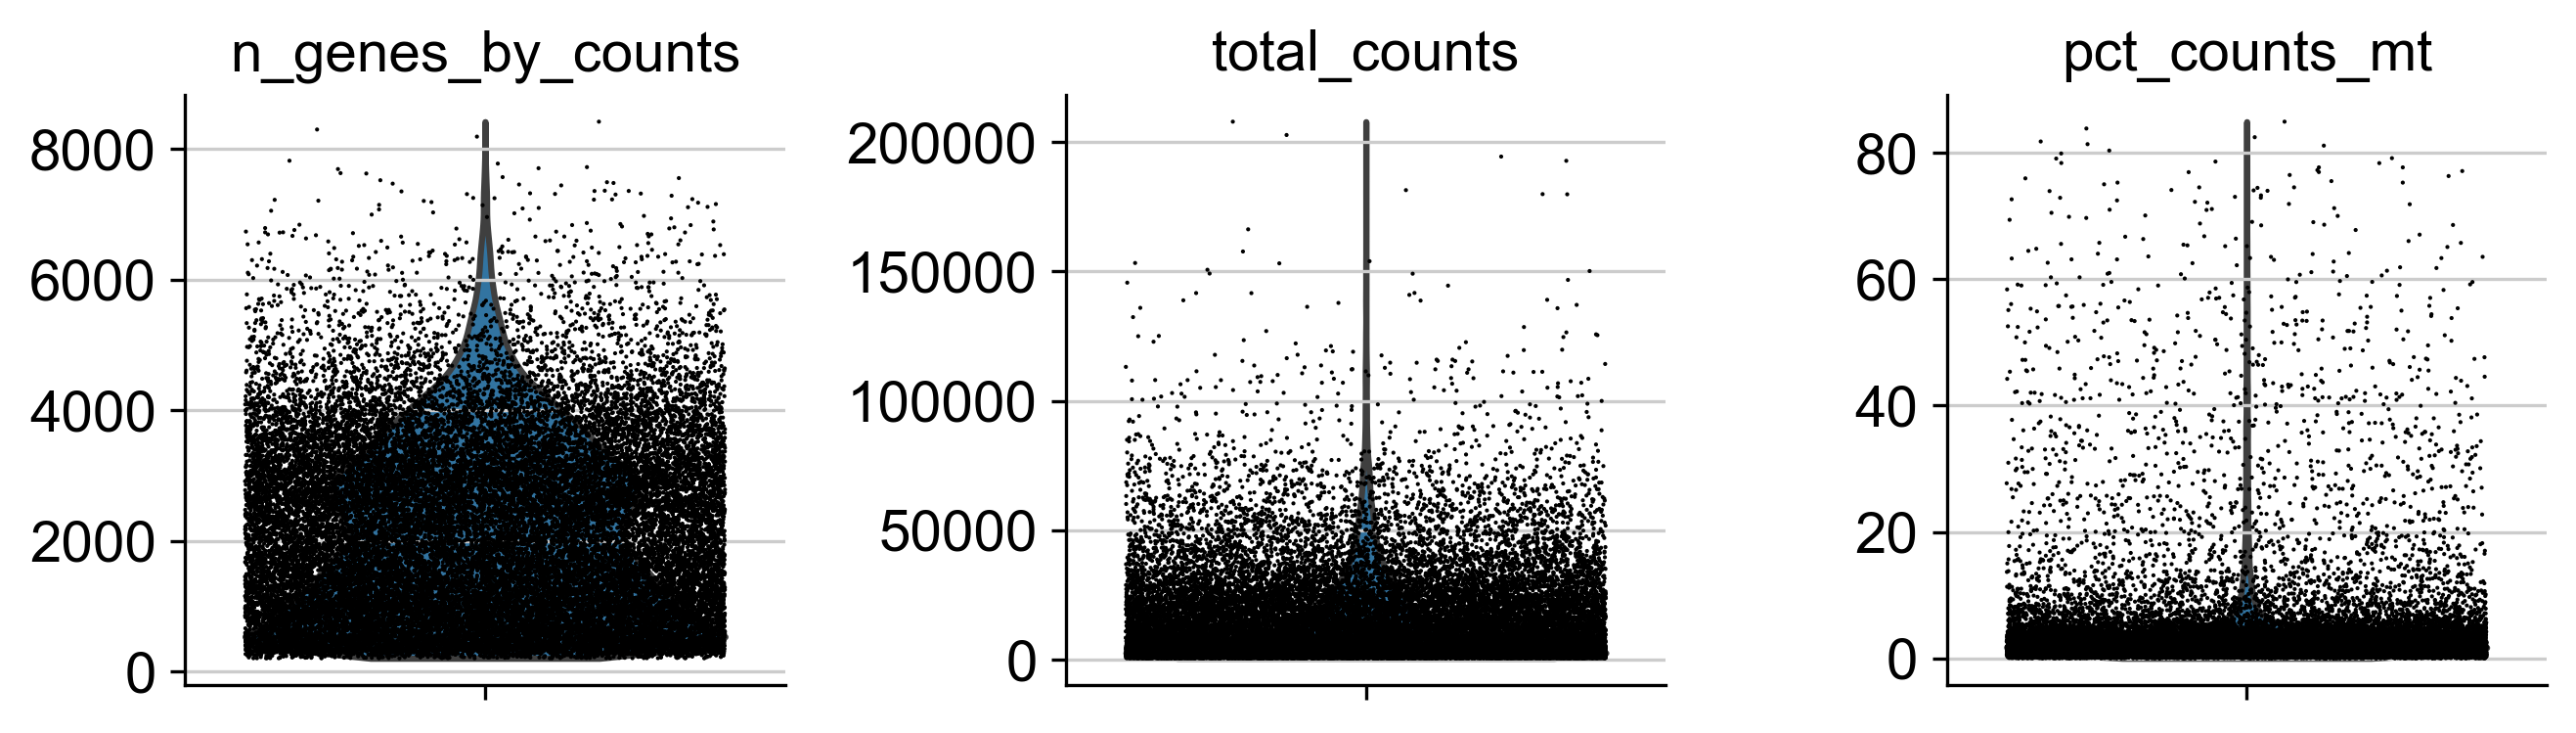

In [21]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

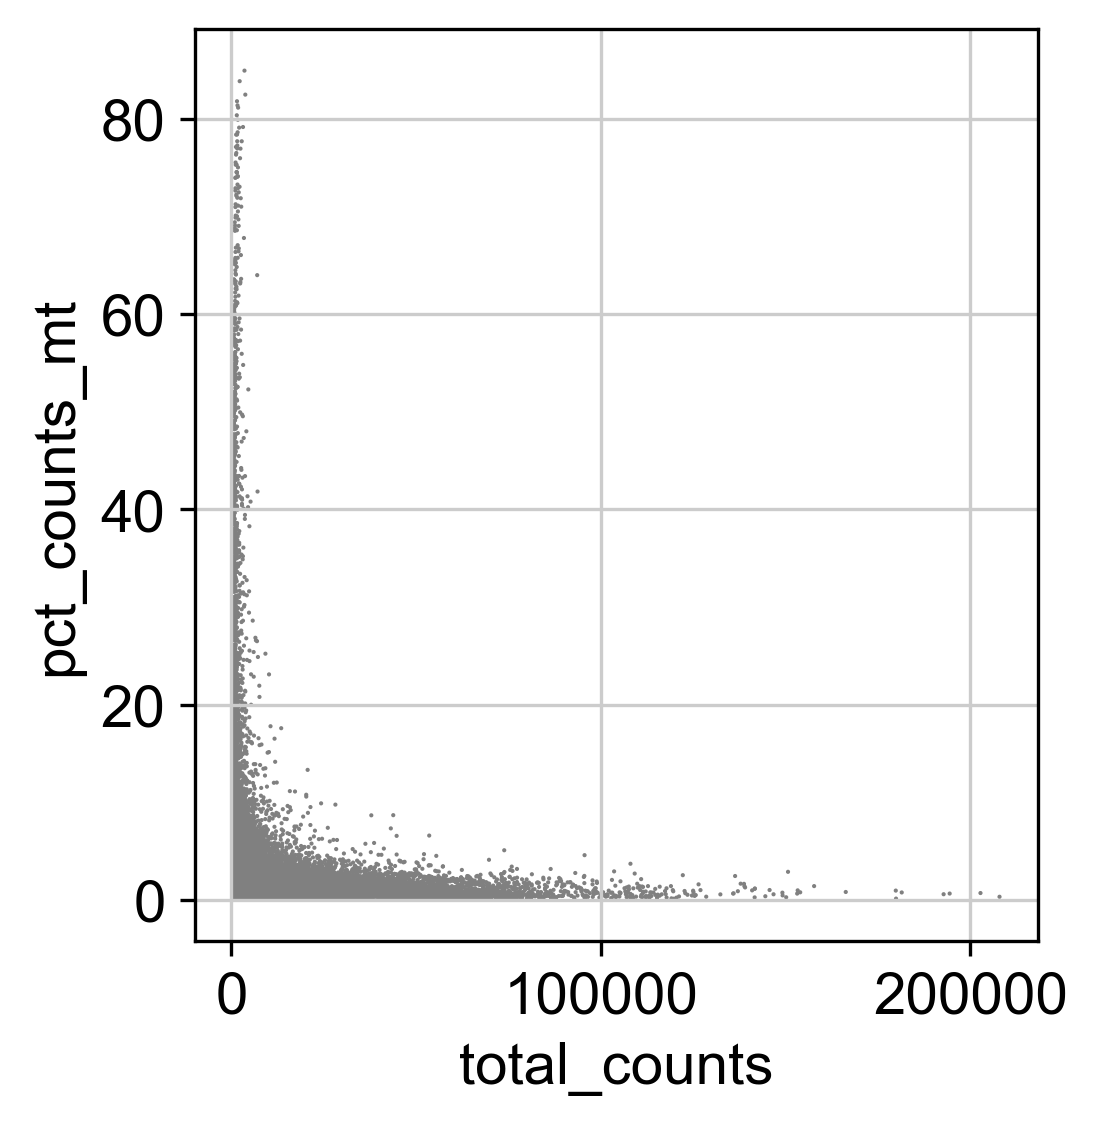

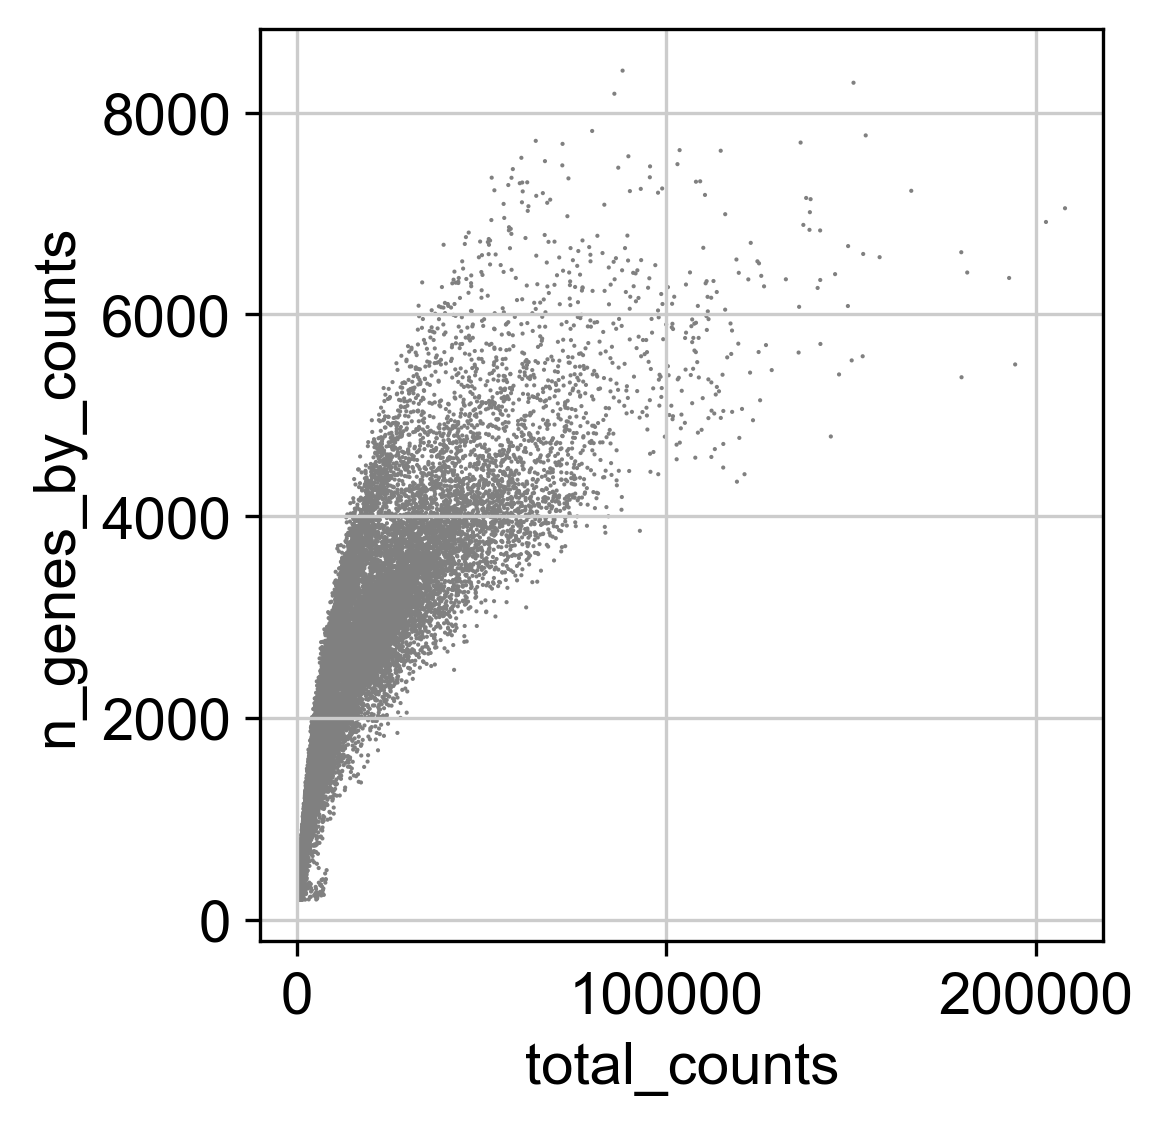

In [22]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [23]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

In [24]:
adata

View of AnnData object with n_obs × n_vars = 27998 × 18287
    obs: 'age', 'sex', 'sample', 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'feature_types', 'genome', 'gene_ids-07-d-diabetic', 'gene_ids-09-d-diabetic', 'gene_ids-10-d-diabetic', 'gene_ids-13-d-diabetic', 'gene_ids-16-d-diabetic', 'gene_ids-non diabetic', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [25]:
sc.pp.normalize_total(adata, target_sum=None)

normalizing counts per cell


c:\users\quanp\miniconda3\envs\scrna\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


In [26]:
sc.pp.log1p(adata)

In [4]:
import scanorama

In [6]:
sc.pp.highly_variable_genes(adata,n_top_genes=3000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [6]:
var_genes=adata.var.highly_variable

In [30]:
batches = adata.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata[adata.obs['sample'] == batch,]

alldata    

{'07-d': View of AnnData object with n_obs × n_vars = 9545 × 18287
     obs: 'age', 'sex', 'sample', 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'feature_types', 'genome', 'gene_ids-07-d-diabetic', 'gene_ids-09-d-diabetic', 'gene_ids-10-d-diabetic', 'gene_ids-13-d-diabetic', 'gene_ids-16-d-diabetic', 'gene_ids-non diabetic', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'log1p', 'hvg',
 '09-d': View of AnnData object with n_obs × n_vars = 2086 × 18287
     obs: 'age', 'sex', 'sample', 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'feature_types', 'genome', 'gene_ids-07-d-diabetic', 'gene_ids-09-d-diabetic', 'gene_ids-10-d-diabetic', 'gene_ids-13-d-diabetic', 'gene_ids-16-d-diabetic', 'gene_ids-non diabetic', 'n_cells', 'mt', 'n_cells_by_counts', 'm

In [31]:
#subset the individual dataset to the same variable genes as in MNN-correct.
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
adatas = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adatas, dimred = 50)

07-d
09-d
10-d
13-d
16-d
19-n
19b-n
19c-n
Found 3000 genes among all datasets
[[0.         0.42857143 0.82248521 0.36300129 0.09670638 0.73624694
  0.2627537  0.13206087]
 [0.         0.         0.34319527 0.28954938 0.28100911 0.03789731
  0.1198466  0.05033557]
 [0.         0.         0.         0.21893491 0.18047337 0.48372781
  0.22781065 0.37130178]
 [0.         0.         0.         0.         0.38016819 0.02716688
  0.32967636 0.22147477]
 [0.         0.         0.         0.         0.         0.09810792
  0.25227751 0.33496847]
 [0.         0.         0.         0.         0.         0.
  0.3538124  0.42848411]
 [0.         0.         0.         0.         0.         0.
  0.         0.53318705]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (0, 5)
Processing datasets (6, 7)
Processing datasets (2, 5)
Processing datasets (0, 1)
Processing datasets (5, 7)
Processing datasets (3, 4)
Processing d

In [32]:
adatas[0].obsm['X_scanorama'].shape

(9545, 50)

In [33]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata.obsm["Scanorama"] = all_s

(27998, 50)


In [34]:
#umap
sc.pp.neighbors(adata, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:10)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)


In [35]:
sc.tl.leiden(adata,resolution=0.1)

running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


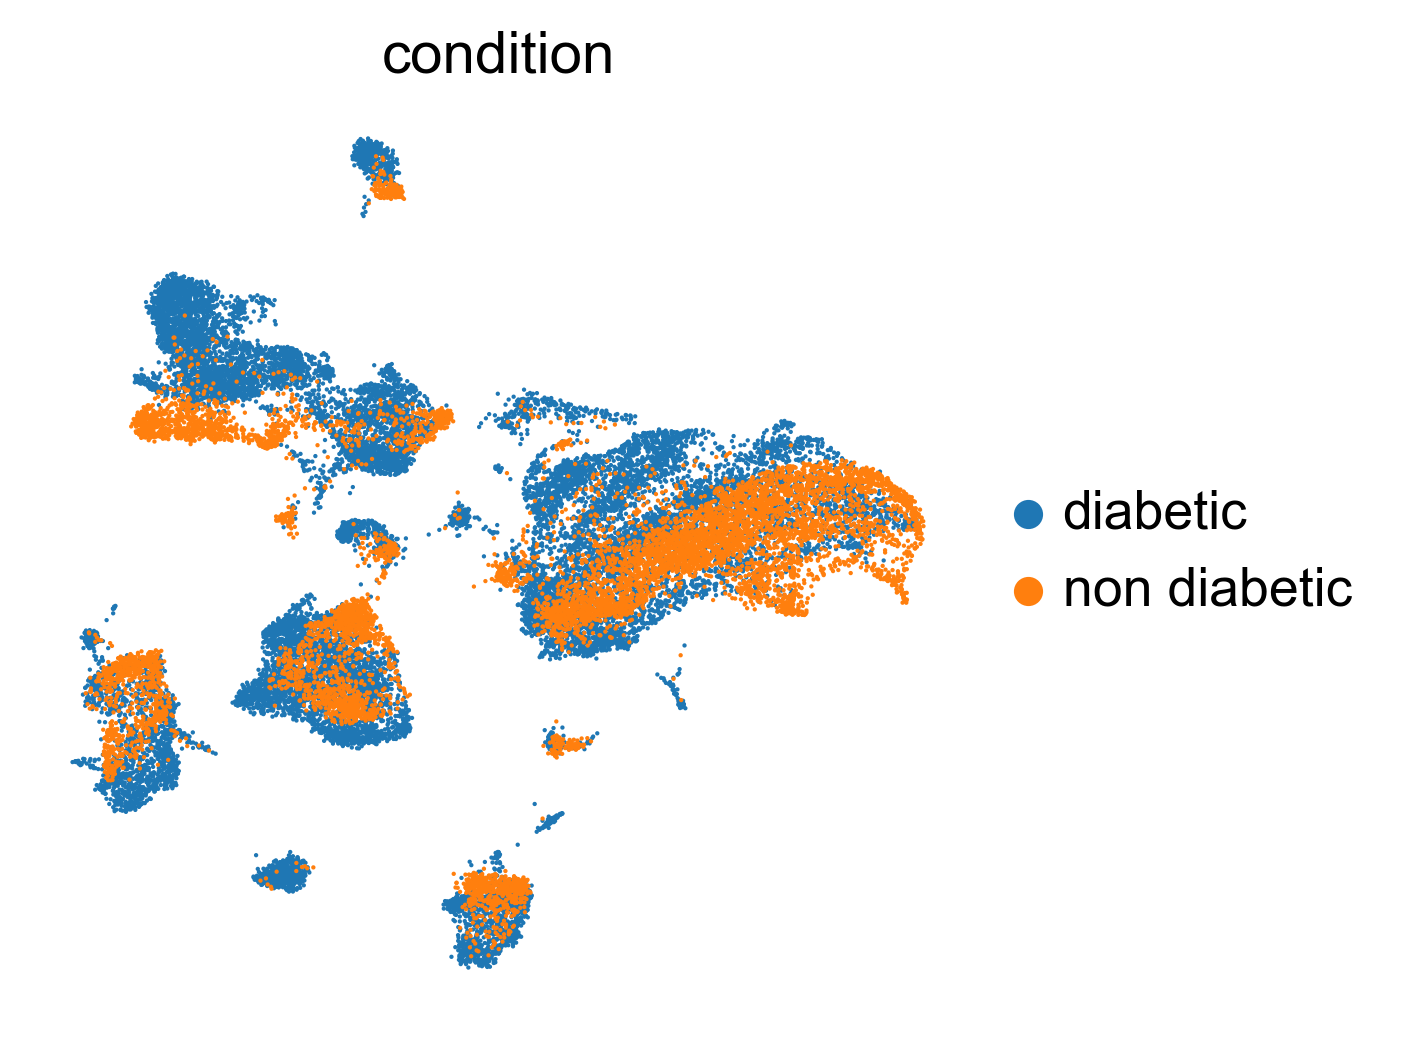

In [153]:
sc.pl.umap(adata,color=['condition'],frameon=False)

In [37]:
adata

AnnData object with n_obs × n_vars = 27998 × 18287
    obs: 'age', 'sex', 'sample', 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'feature_types', 'genome', 'gene_ids-07-d-diabetic', 'gene_ids-09-d-diabetic', 'gene_ids-10-d-diabetic', 'gene_ids-13-d-diabetic', 'gene_ids-16-d-diabetic', 'gene_ids-non diabetic', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'sample_colors', 'leiden_colors'
    obsm: 'Scanorama', 'X_umap'
    obsp: 'distances', 'connectivities'

In [36]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:32)


In [26]:
diffgene=pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

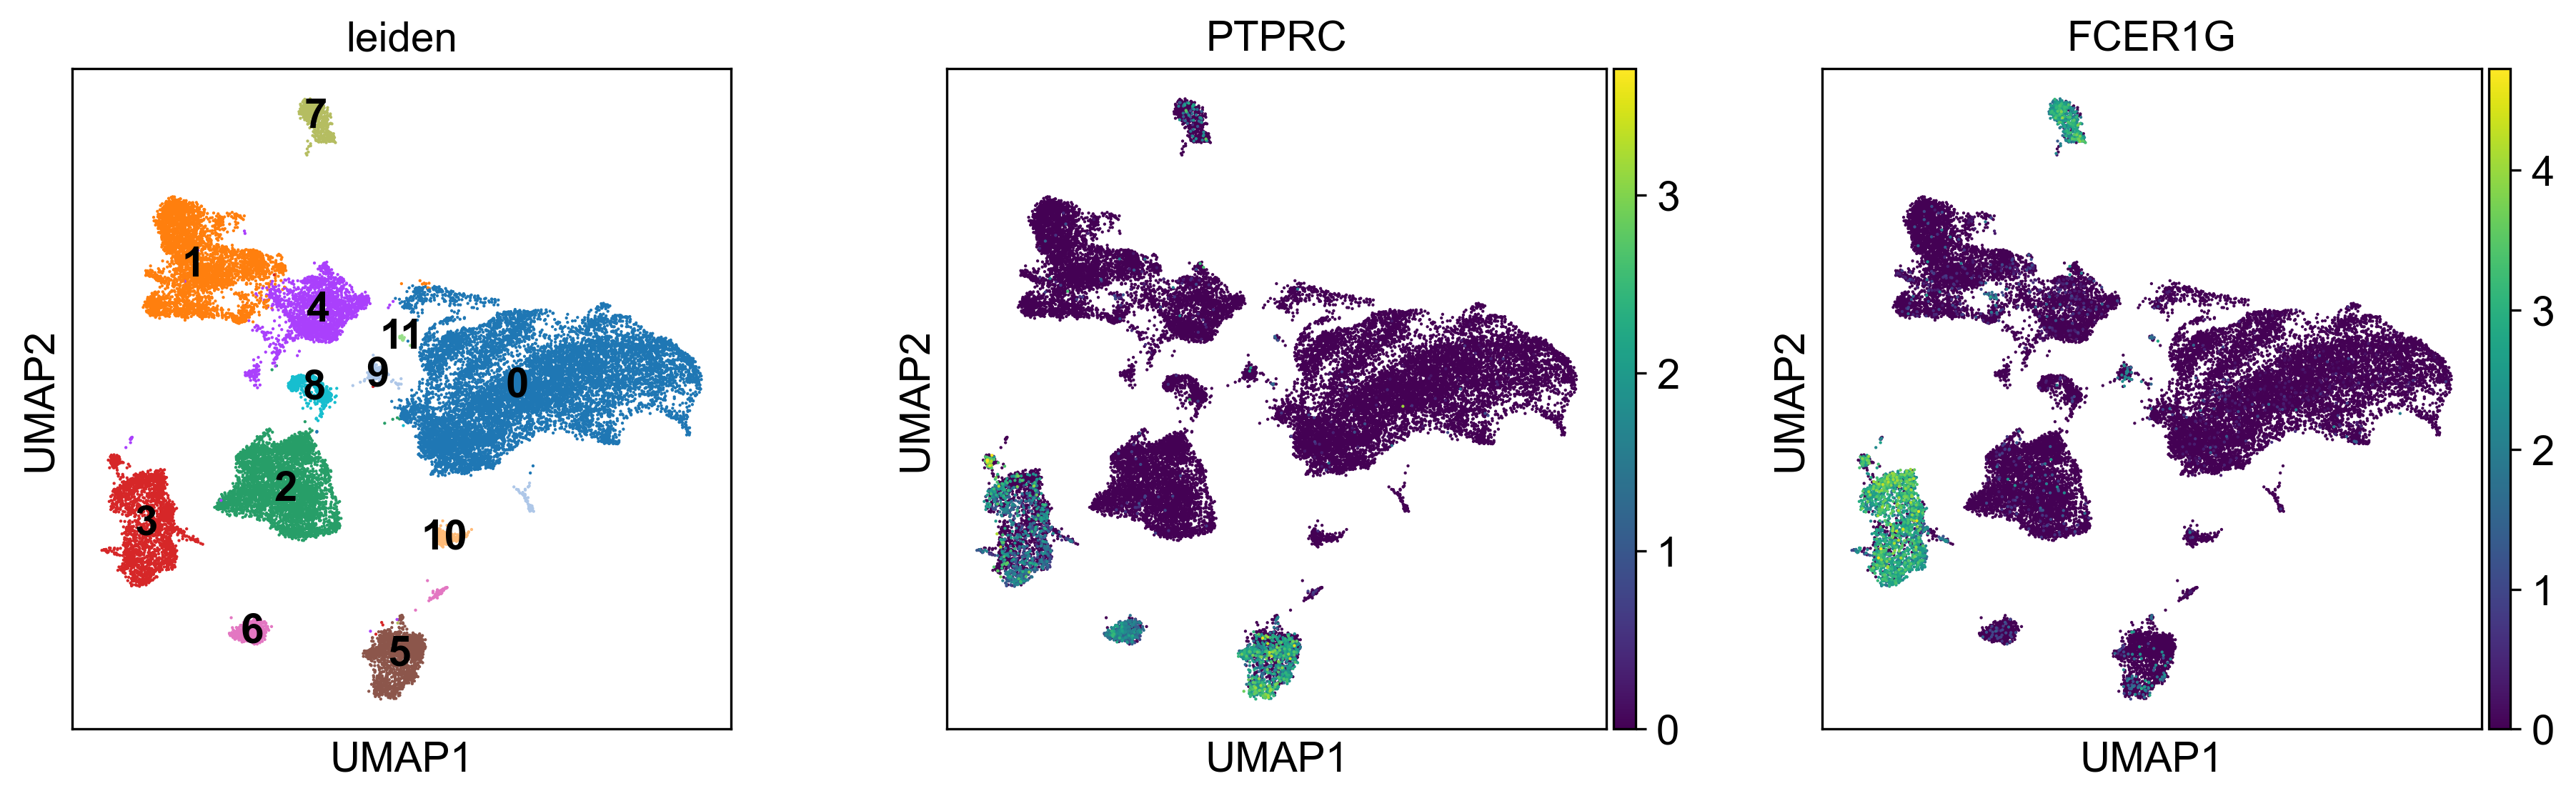

In [15]:
sc.pl.umap(adata,color=['leiden','PTPRC','FCER1G'],legend_loc='on data')

In [56]:
adata.write('woundintegrate.h5ad')

In [5]:
clusteranno={
    '0':'Keratinocytes',
    '9':'Keratinocytes',
    '10':'Keratinocytes',
    '11':'Keratinocytes',
    '1':'Fibroblasts',
    '4':'Pericytes',
    '2':'Blood Vessels',
    '8':'Lymphatic Vessels',
    '3':'Macrophages',
    '5':'T Cells',
    '6':'B Cells',
    '7':'Mast Cells',
}
adata.obs['Cell Type']=adata.obs['leiden'].map(clusteranno).astype('category')

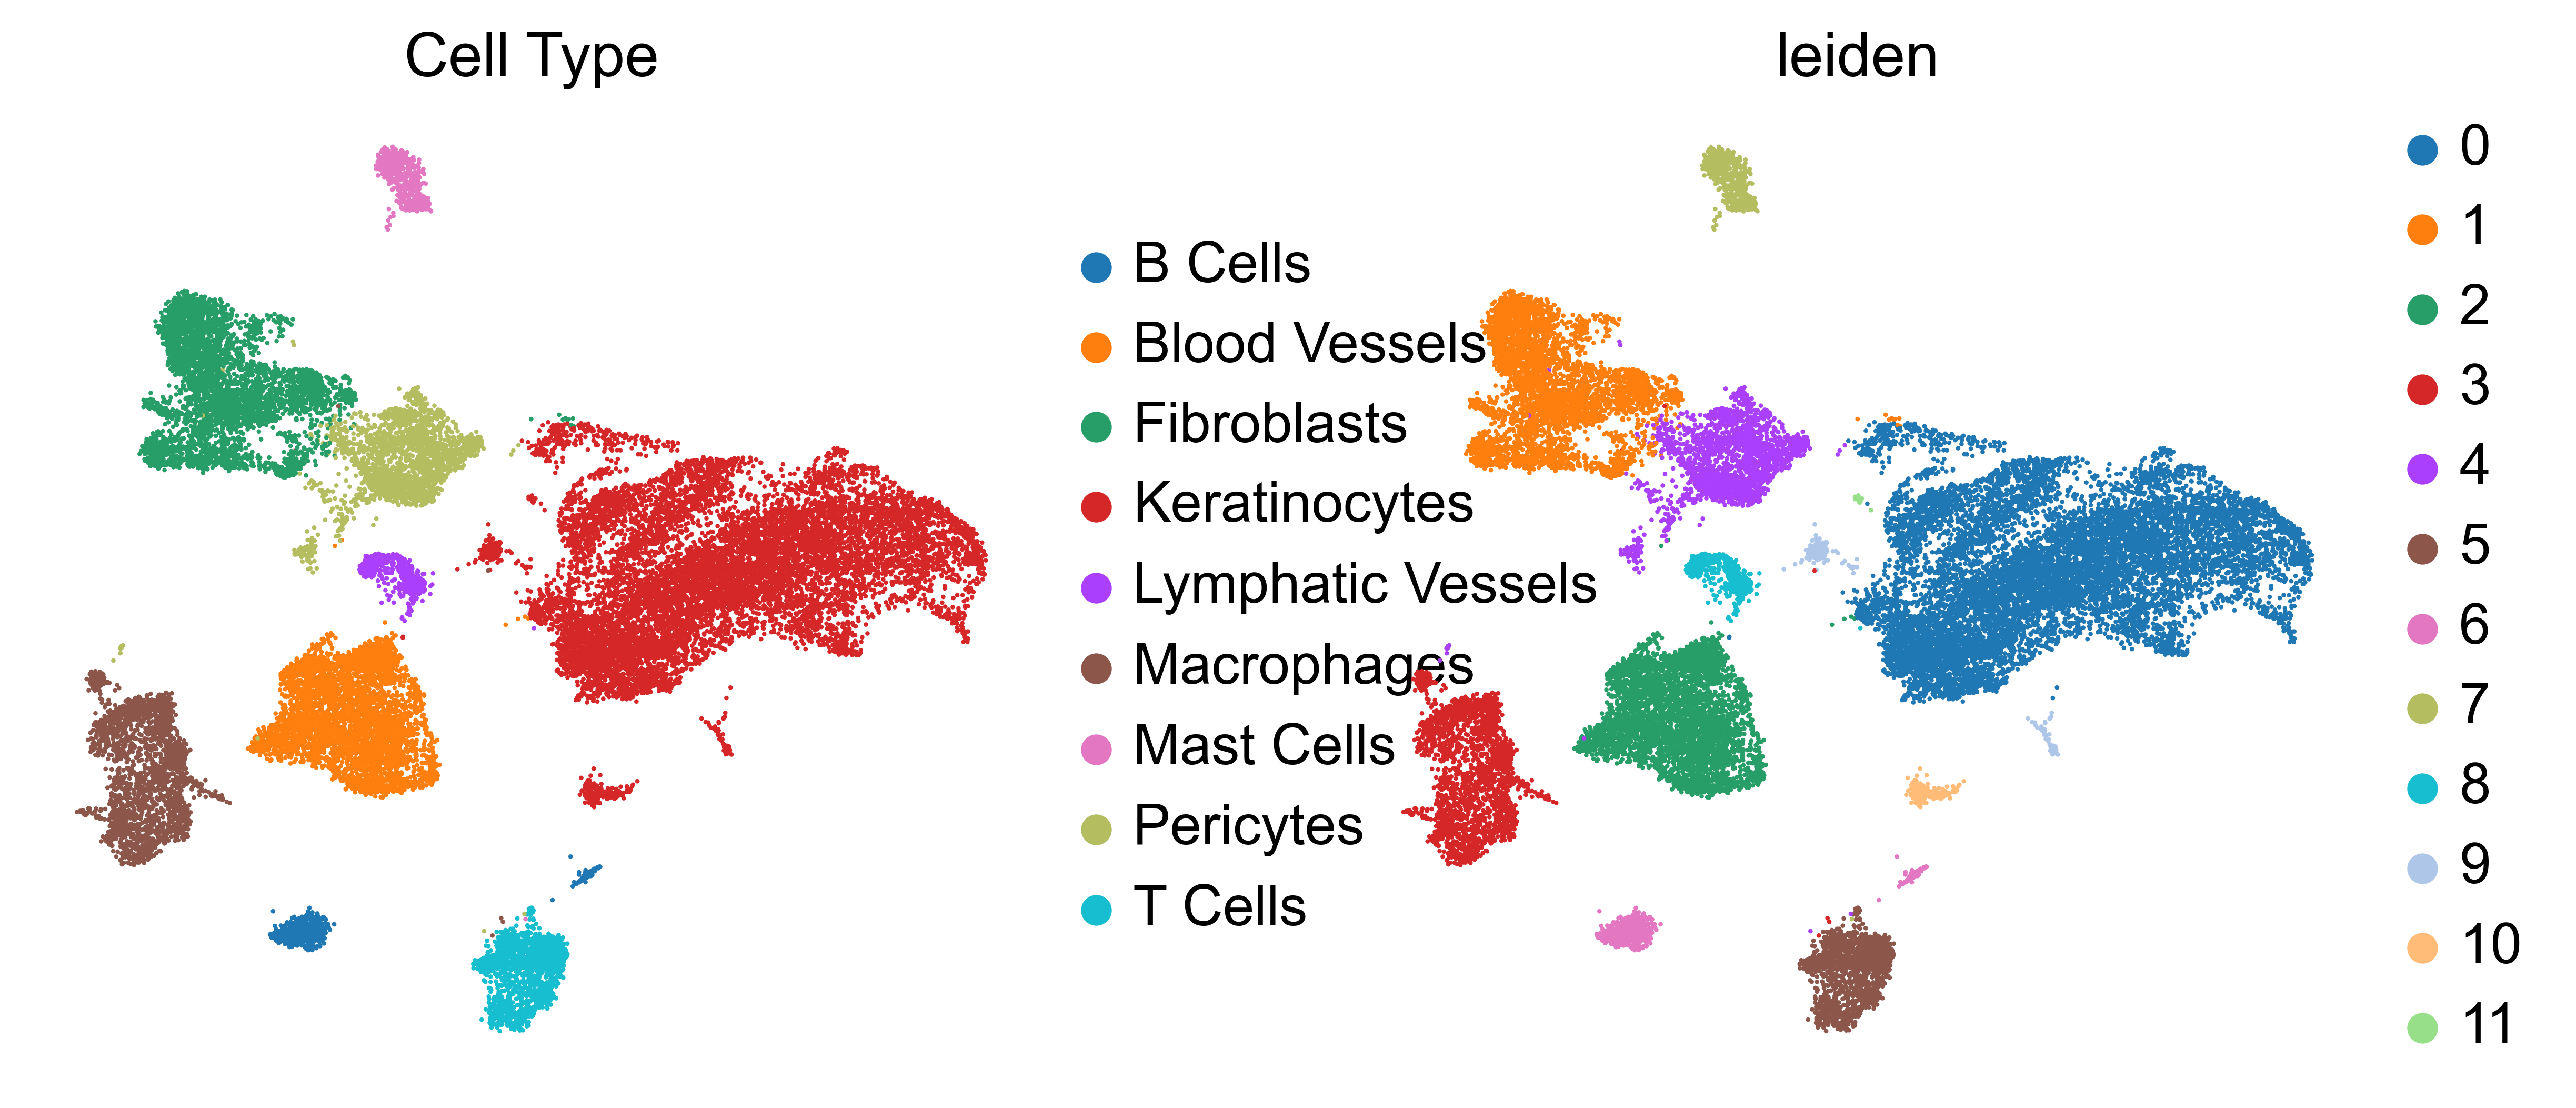

In [7]:
sc.pl.umap(adata,color=['Cell Type','leiden'],frameon=False)

In [23]:
pd.crosstab(adata.obs['Cell Type'],adata.obs['condition'])

condition          diabetic  non diabetic
Cell Type                                
Keratinocytes 1        6437          4809
Fibroblasts            3350           967
Blood Vessels          3030          1202
Macrophages            1594           748
Pericytes              1730           372
T Cells                1109           494
B Cells                 588            13
Mast Cells              428           152
Lymphatic Vessels       380           111
Keratinocytes 2         279             9
Keratinocytes 3          77            95
Keratinocytes 4          24             0

In [ ]:
#Epidermis analysis

In [16]:
batches = adata_epi.obs['sample'].cat.categories.tolist()
alldata = {}
for batch in batches:
    alldata[batch] = adata_epi[adata_epi.obs['sample'] == batch,]  

In [17]:
#subset the individual dataset to the same variable genes as in MNN-correct.
alldata2 = dict()
for ds in alldata.keys():
    print(ds)
    alldata2[ds] = alldata[ds][:,var_genes]

#convert to list of AnnData objects
adata_epis = list(alldata2.values())

# run scanorama.integrate
scanorama.integrate_scanpy(adata_epis, dimred = 50)

07-d
09-d
10-d
13-d
16-d
19-n
19b-n
19c-n
Found 3000 genes among all datasets
[[0.         0.49494949 0.90136054 0.76086957 0.625      0.77910448
  0.30393996 0.17371134]
 [0.         0.         0.32323232 0.26086957 0.13888889 0.17171717
  0.10131332 0.26767677]
 [0.         0.         0.         0.31521739 0.13194444 0.72108844
  0.08503401 0.40136054]
 [0.         0.         0.         0.         0.32608696 0.36956522
  0.42391304 0.67391304]
 [0.         0.         0.         0.         0.         0.26388889
  0.55555556 0.31944444]
 [0.         0.         0.         0.         0.         0.
  0.5272045  0.42474227]
 [0.         0.         0.         0.         0.         0.
  0.         0.7879925 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (0, 2)
Processing datasets (6, 7)
Processing datasets (0, 5)
Processing datasets (0, 3)
Processing datasets (2, 5)
Processing datasets (3, 7)
Processing datasets (0, 4)
Processing d

In [18]:
adata_epis[0].obsm['X_scanorama'].shape

(5814, 50)

In [19]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in adata_epis]

# make into one matrix.
all_s = np.concatenate(scanorama_int)
print(all_s.shape)

# add to the AnnData object
adata_epi.obsm["Scanorama"] = all_s

(11558, 50)


In [20]:
#umap
sc.pp.neighbors(adata_epi, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(adata_epi)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


In [21]:
sc.tl.leiden(adata_epi,resolution=0.2)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


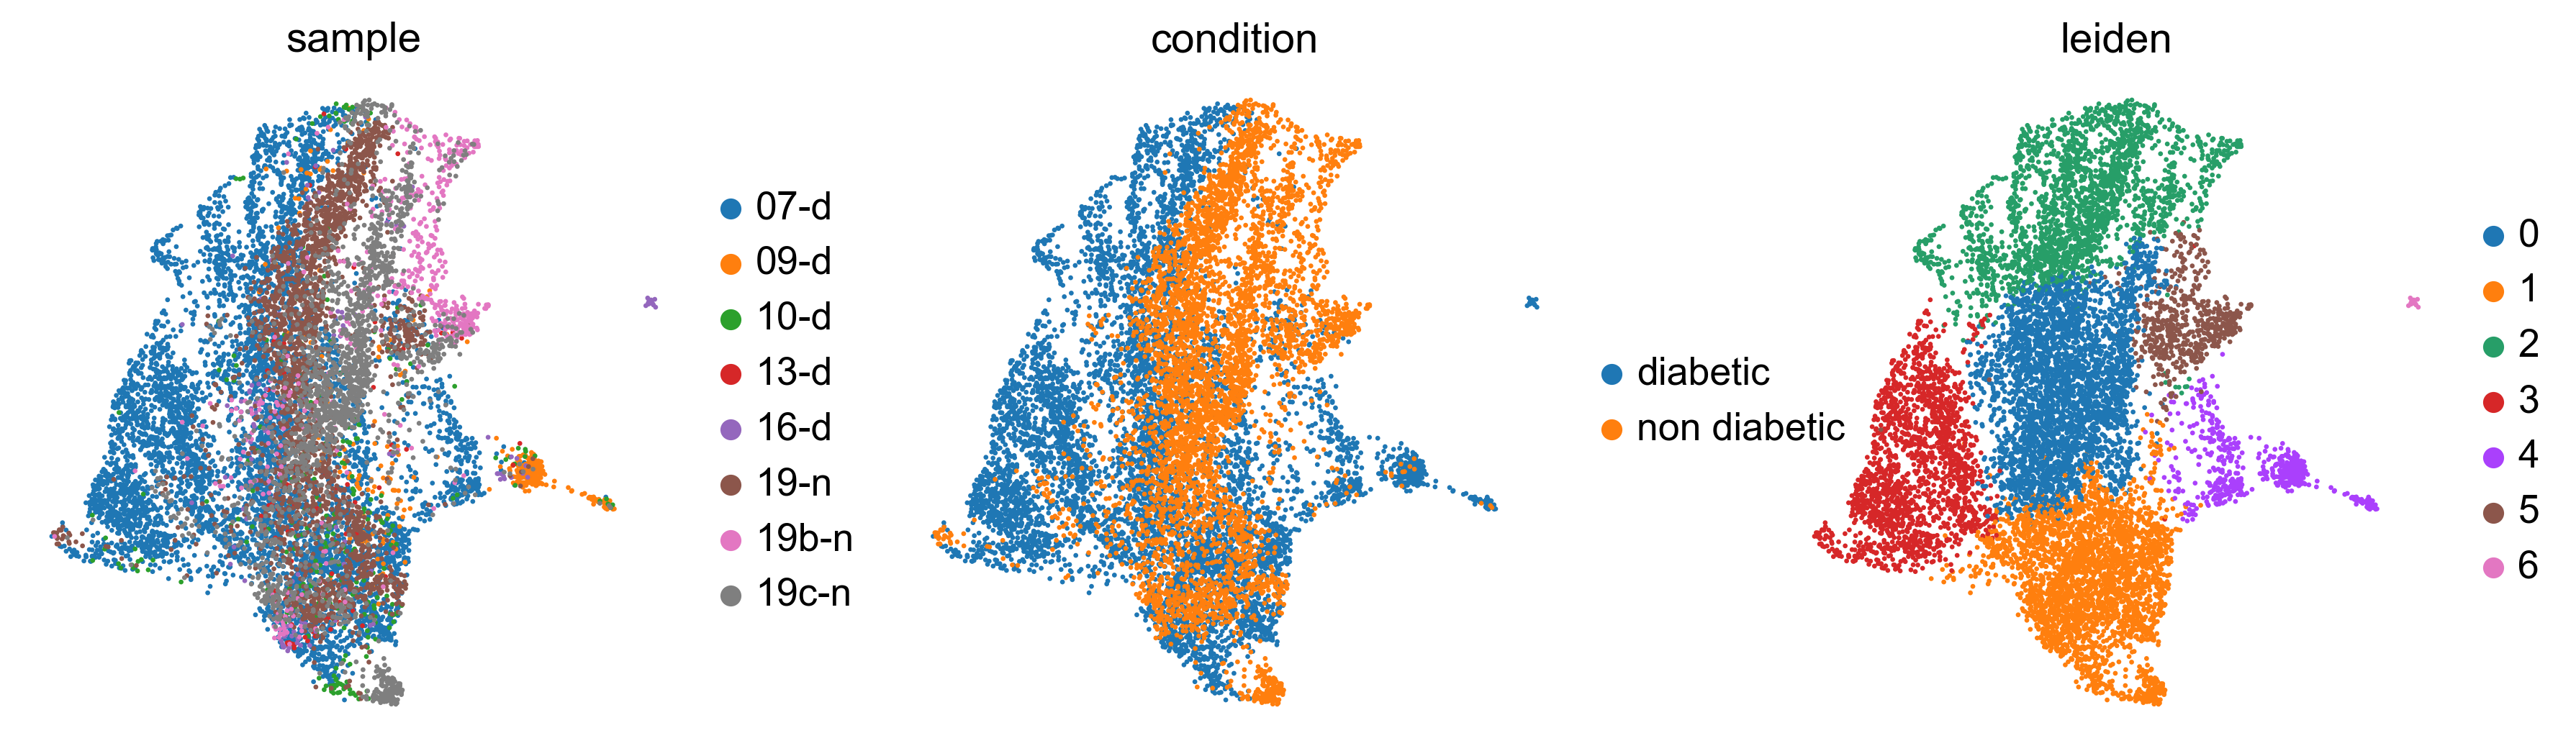

In [23]:
sc.pl.umap(adata_epi,color=['sample','condition','leiden'],frameon=False)

In [81]:
sc.tl.rank_genes_groups(adata_epi, 'condition', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [69]:
pd.DataFrame(adata_epi.uns['rank_genes_groups']['names']).head(100)

diabetic non diabetic
0     ALDOA       RPS4Y1
1     RPS17        RPL41
2    ARPC1B        EIF5A
3       AK1        FKBP4
4      MKKS     HSP90AA1
..      ...          ...
95    VDAC2         GARS
96   POLR1D       SEC61G
97   NDUFV2        SERP1
98    ARL5A  MIR4435-2HG
99    RPS23         IER5

[100 rows x 2 columns]

In [154]:
epi=sc.get.rank_genes_groups_df(adata_epi,group='diabetic')

In [155]:
epi=epi[epi.logfoldchanges>2]

In [156]:
epi=epi[epi.pvals_adj<0.01]

In [157]:
epi.head(100)

scores    names  logfoldchanges         pvals     pvals_adj
0    143.736465    ALDOA        3.755168  0.000000e+00  0.000000e+00
2     75.437653      AK1        3.659083  0.000000e+00  0.000000e+00
3     74.988213   ARPC1B        2.115649  0.000000e+00  0.000000e+00
4     69.482841     MKKS        2.608021  0.000000e+00  0.000000e+00
6     62.569069     SCO2        9.131716  0.000000e+00  0.000000e+00
..          ...      ...             ...           ...           ...
764   13.784627     WNT3        2.282838  8.170787e-43  1.237939e-41
765   13.781070   CTHRC1        2.341092  8.452580e-43  1.279572e-41
767   13.771165      DPT        3.673154  1.194152e-42  1.801770e-41
781   13.552719  C4orf36        5.057789  2.462778e-41  3.640810e-40
795   13.413889      HCK        2.304932  1.129632e-40  1.639491e-39

[100 rows x 5 columns]

In [86]:
epi.to_csv('epidermisup.csv')

In [160]:
epi=sc.get.rank_genes_groups_df(adata_epi,group='non diabetic')

In [161]:
epi=epi[epi.logfoldchanges>2]

In [162]:
epi=epi[epi.pvals_adj<0.01]

In [90]:
epi.head(100)

scores       names  logfoldchanges          pvals      pvals_adj
0     134.928955      RPS4Y1        5.225348   0.000000e+00   0.000000e+00
6      51.226120       CRYAB        2.563951   0.000000e+00   0.000000e+00
14     44.837025      HSPA1B        2.220768   0.000000e+00   0.000000e+00
15     44.835342       RECQL        3.629840   0.000000e+00   0.000000e+00
21     38.473465      EIF1AY        3.505713  6.324525e-290  1.726218e-287
...          ...         ...             ...            ...            ...
1057    8.671900      SPRR2B        4.315919   5.669498e-18   4.029464e-17
1075    8.569879        SAA1        2.114418   1.290507e-17   9.048889e-17
1079    8.542100      COL2A1        3.109469   1.673588e-17   1.166790e-16
1091    8.495067   LINC00592        2.705448   2.539430e-17   1.756375e-16
1094    8.464696  AC068831.6        3.234568   3.271135e-17   2.253079e-16

[100 rows x 5 columns]

In [91]:
epi.to_csv('epidermisdown.csv')